In [1]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def main():

  input_file = 'Employees.csv'

  log('Extract Phase Started')  
  df_1 = extract(input_file)
  log('Extract Phase Ended')

  log('Transform Phase Started')  
  df_2 = transform(df_1)
  log('Transform Phase Ended')

  log('Load Phase Started')  
  load(df_2)
  log('Load Phase Ended')

  analysis()



In [3]:
def extract(raw_file):

  df = pd.read_csv(raw_file)
  return df

In [4]:
def transform(df_inp):

  #print(df_inp.head())
  
  #(1) retain employees with name, and drop the rest

  df_inp = df_inp[df_inp['First Name'].notna()]

  #(2) provide default-values to gender, and team 

  df_inp['Gender'] = df_inp['Gender'].fillna('Unknown')

  df_inp['Team'] = df_inp['Team'].fillna('Intern')

  #print(df_inp.isna().sum())

  #print(df_inp['Gender'].value_counts())
  #print(df_inp['Team'].value_counts())
  

  #(3) remove spaces from column-headers

  relabel = {'First Name':'First_Name',
             'Start Date':'Start_Date',
             'Last Login Time':'Last_Login_Time',
             'Senior Management':'Senior_Management'}

  for col in df_inp.columns:
    if col in relabel.keys():
      df_inp = df_inp.rename( columns = {col : relabel[col] })

  #print(df_inp.head())

  return df_inp

In [5]:
def load(df_inp):

  db_name = "Organization.db"
  tbl_name = "Employees"

  cn = sqlite3.connect(db_name)
  df_inp.to_sql(tbl_name, con= cn, index=False, if_exists="replace")



In [6]:
def log(message):

  timestamp_format = '%H:%M:%S-%h-%d-%Y'

  current_time = datetime.now()

  timestamp = current_time.strftime(timestamp_format)

  with open("logfile.txt", "a") as f:
    f.write(timestamp + ':' + message +"\n")


In [7]:
def analysis():
  db_name = "Organization.db"
  tbl_name = "Employees"

  cn = sqlite3.connect(db_name)
  cr = cn.cursor()

  #(Q1) find employees gender wise
  cr.execute("select Gender, count(*) from "+ tbl_name +" group by Gender")
  content1 = cr.fetchall()
  #plot(content1)  


  
  #(Q2) find how many employees work in each team
  cr.execute("select Team, count(*) from "+ tbl_name +" group by Team")
  content2 = cr.fetchall()
  #plot(content2)  

  sub_plots(content1, content2)

In [8]:
def plot(data):
  x_values = []
  y_values = []

  for pair in data:
    x_values.append(pair[0])
    y_values.append(pair[1])

  plt.bar(x_values, y_values, width=0.8)
  plt.xticks(rotation = 90)

In [9]:
def sub_plots(data1, data2):
  fig , axes = plt.subplots(2, 1, figsize=(10, 10))         #(width, height)

  ax1, ax2 = axes[0], axes[1]

  ax1.set_title('Gender-wise Employee distribution')
  ax2.set_title('Team-wise Employee distribution')

  x_values = []
  y_values = []

  for pair in data1:
    x_values.append(pair[0])
    y_values.append(pair[1])
  ax1.bar(x_values, y_values)

  x_values = []
  y_values = []

  for pair in data2:
    x_values.append(pair[0])
    y_values.append(pair[1])
  ax2.bar(x_values, y_values)


  plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


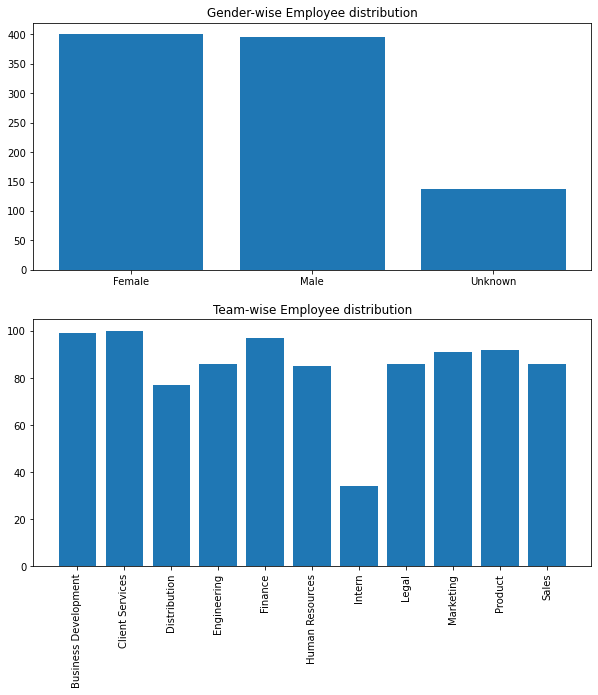

In [11]:
main()

In [ ]:
def check():
  cn = sqlite3.connect("Organization.db")
  cr = cn.cursor()

  cr.execute("select * from Employees")

  content = cr.fetchall()

  print(len(content))

verify()

933
